In [1]:
#Import dependencies

import time
import os.path

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

%matplotlib inline

import ROOT

import root_pandas as rpd
from root_pandas import read_root

import matplotlib.ticker as mticker

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))

Welcome to JupyROOT 6.14/04


In [2]:
def getData(inputFiles):
    
    # These exist in the tree named tnj
    
    scalarColumns = []
    scalarColumns.append('Q')
    scalarColumns.append('x')
    scalarColumns.append('y')
    scalarColumns.append('e')
    scalarColumns.append('m')
    scalarColumns.append('pt')
    scalarColumns.append('phi')
    scalarColumns.append('eta')
    scalarColumns.append('mult')
    scalarColumns.append('zg')
    scalarColumns.append('delphi')
    scalarColumns.append('sdm')
    scalarColumns.append('xsec')
    scalarColumns.append('lpt')
    scalarColumns.append('ntrials')

    arrayColumns = []

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile, 'tnj', columns = columns, flatten = arrayColumns) 
        end = time.time()
        print 'Processed {0} in {1} seconds'.format(filename, end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [3]:
def getPartData(inputFiles):
    
    # These exist in the tree named tne
    
    scalarColumns = []
    scalarColumns.append('xsec')
    scalarColumns.append('Q')
    scalarColumns.append('W')
    scalarColumns.append('x')
    scalarColumns.append('y')
    scalarColumns.append('ntrials')

    arrayColumns = []

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile, 'tne', columns = columns, flatten = arrayColumns) 
        end = time.time()
        print 'Processed {0} in {1} seconds'.format(filename, end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [4]:
filename  = ['/Users/jose/EIC/data/eic_dis.root']

data      = getData(filename)
part_data = getPartData(filename)

Processed eic_dis.root in 0.33985877037 seconds
Processed eic_dis.root in 0.373286962509 seconds


In [5]:
ntrials = data['ntrials'][data.shape[0]-1]

In [6]:
data.eval('Q2 = Q*Q', inplace=True)

In [7]:
data      = data.query('0.01 < y < 0.95')
part_data = part_data.query('0.01 < y < 0.95')

In [8]:
def plotData(array, bins, arange = None, color = 'red', fillstyle = 'full', normed = None, label = ''):
    
    counts, edges = np.histogram(array, bins = bins, range = arange)
    binWidth = edges[1] - edges[0]
    
    yerr = np.sqrt( 10 * (counts * np.mean(data['xsec']) * 1e12) / ntrials )
    
    if normed == True:
    
        plt.errorbar(edges[:-1] + binWidth / 2, (10 * (counts * np.mean(data['xsec']) * 1e12) / ntrials), xerr = binWidth / 2, yerr = yerr, color = color, fillstyle = fillstyle, fmt='o', label = label)

    else:
        
        plt.errorbar(edges[:-1] + binWidth / 2, (counts * np.mean(data['xsec']) * 1e9) / (binWidth*ntrials), xerr = binWidth / 2, yerr = np.sqrt(counts) * np.mean(data['xsec']) * 1e9 / (binWidth*ntrials), color = color, fillstyle = fillstyle, fmt='o', label = label)

In [9]:
def plotDataDelphi(array, bins, color = 'red', fillstyle = 'full', normed = None, label = ''):
    
    counts, edges = np.histogram(array, bins = bins)
    binWidth = edges[1] - edges[0]
    
    yerr =  np.sqrt( 10 * (counts * np.mean(data['xsec']) * 1e12) / ntrials )
    
    if normed == True:
    
        plt.errorbar(edges[:-1] + binWidth / 2, ( counts*(np.mean(data['xsec']) * 1e12) ) / ( ntrials), xerr = binWidth / 2, yerr = yerr, color = color, fillstyle = fillstyle, fmt='o', label = label)

3560


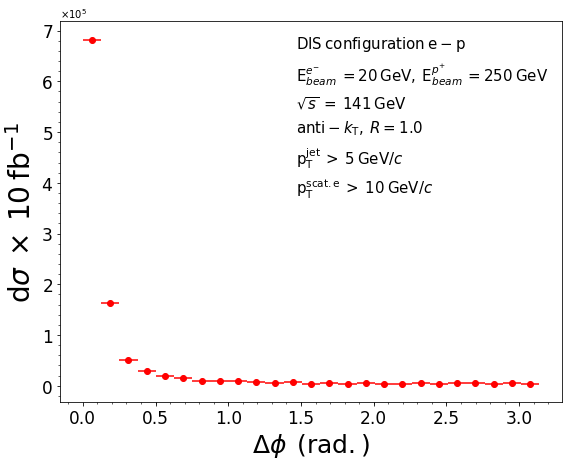

In [10]:
fig,ax  = plt.subplots(figsize=(9,7))

plotDataDelphi(data.query('lpt > 10')['delphi'], bins = 25, normed = True)
plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{scat. e} \: > \: 10 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\Delta \phi \:\:(\mathrm{rad.})$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.ylabel(r'$\mathrm{d} \sigma \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 28)
# plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})
ax.yaxis.set_major_formatter(formatter)

counts, edges = np.histogram(data.query('lpt > 10')['delphi'], bins = 25)
print np.sum( counts )

plt.savefig('ep_sim_jetElec_delphi_lptCut.pdf')

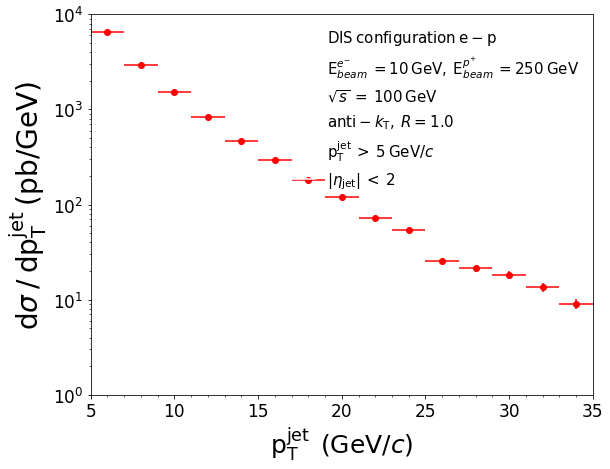

In [11]:
fig,ax = plt.subplots(figsize=(9,7))

plotData(data['pt'], bins = 25, arange = (5,55))

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 10 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:100 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$|\eta_{\mathrm{jet}}| \: <  \: 2$', color='white')

plt.xlabel(r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \:\:(\mathrm{GeV}/c)$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(5,35)
plt.ylabel(r'$\mathrm{d} \sigma \:/\: \mathrm{d} \mathrm{p}_\mathrm{T}^\mathrm{jet} \: (\mathrm{pb}/\mathrm{GeV})$', fontsize = 28)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.ylim(1,10000)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})
# ax.yaxis.set_major_formatter(formatter)

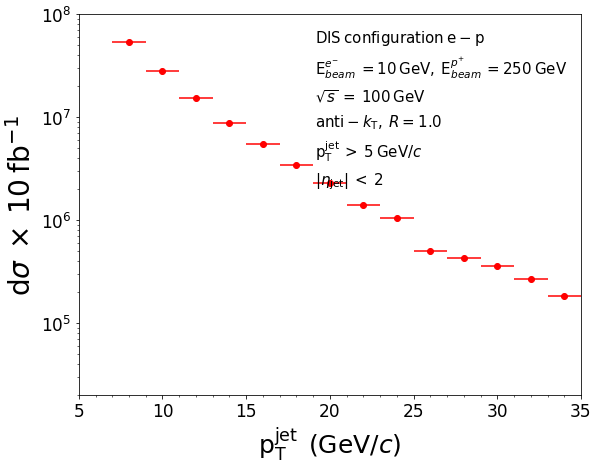

In [12]:
fig,ax = plt.subplots(figsize=(9,7))

plotData(data.query('abs(eta) < 2')['pt'], bins = 25, arange = (5,55), normed = True)

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 10 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:100 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$|\eta_{\mathrm{jet}}| \: <  \: 2$', color='white')

plt.xlabel(r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \:\:(\mathrm{GeV}/c)$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(5,35)
plt.ylabel(r'$\mathrm{d} \sigma \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 28)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.ylim(20000,100000000)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})
# ax.yaxis.set_major_formatter(formatter)

3560


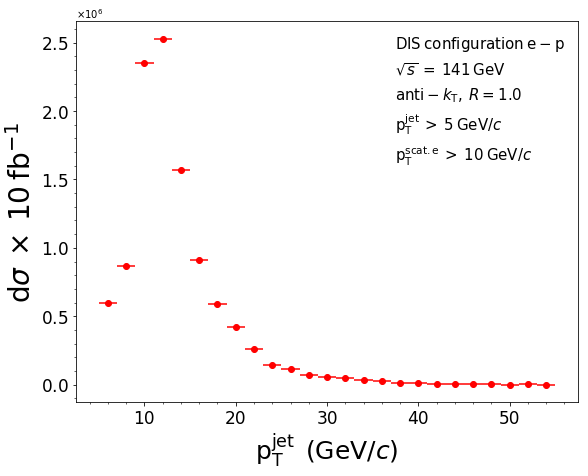

In [13]:
fig,ax = plt.subplots(figsize=(9,7))

plotData(data.query('lpt > 10')['pt'], bins = 25, arange = (5,55), normed = True)

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{scat. e} \: > \: 10 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \:\:(\mathrm{GeV}/c)$', fontsize = 25)
plt.xticks(fontsize = 17)
# plt.xlim(9,50)
plt.ylabel(r'$\mathrm{d} \sigma \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 28)
# plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})
ax.yaxis.set_major_formatter(formatter)

counts, edges = np.histogram(data.query('lpt > 10')['pt'], bins = 25)
print np.sum( counts )

plt.savefig('ep_sim_jet_pT_lptCut.pdf')

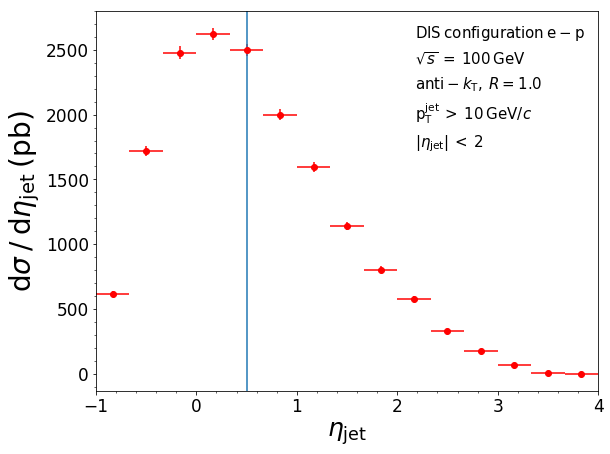

In [14]:
fig,ax = plt.subplots(figsize=(9,7))

plotData(data.query('pt > 10')['eta'], bins = 15, arange = (-1,4))

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:100 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 10 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$|\eta_{\mathrm{jet}}| \: <  \: 2$', color='white')

plt.xlabel(r'$\eta_{\mathrm{jet}}$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(-1, 4)
plt.ylabel(r'$\mathrm{d} \sigma \: / \: \mathrm{d} \eta_\mathrm{jet} \: (\mathrm{pb})$', fontsize = 28)
# plt.yscale("log")
plt.yticks(fontsize =17)
plt.axvline(x=0.5)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})
# ax.yaxis.set_major_formatter(formatter)

3560


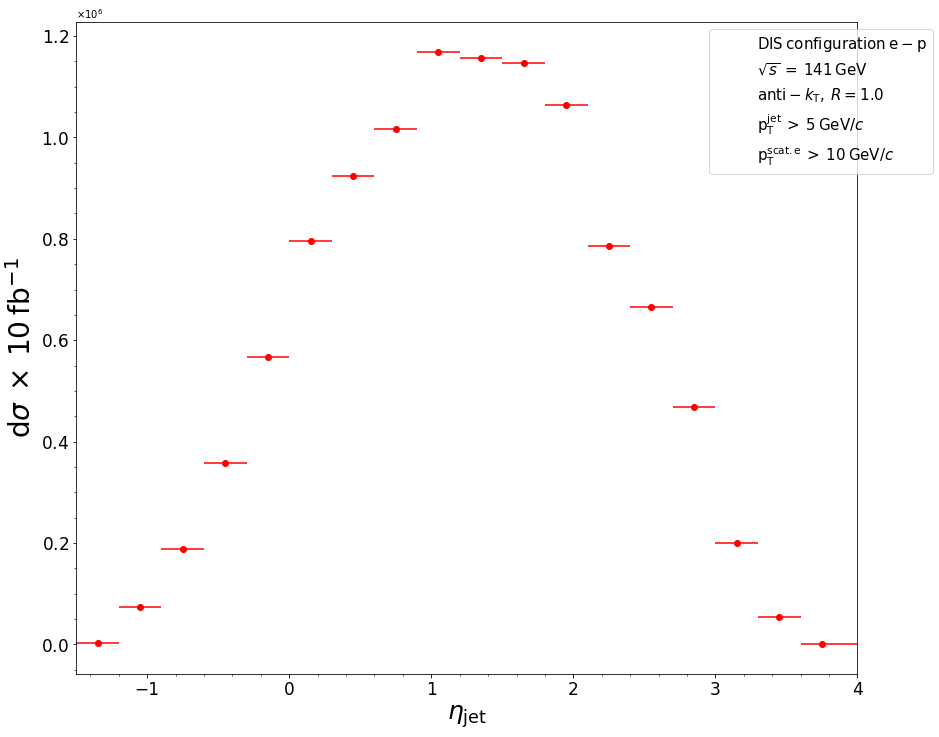

In [15]:
fig,ax = plt.subplots(figsize=(14,12))

plotData(data.query('lpt > 10')['eta'], bins = 25, arange = (-1.5,6), normed = True)

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{scat. e} \: > \: 10 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\eta_{\mathrm{jet}}$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(-1.5, 4)
plt.ylabel(r'$\mathrm{d} \sigma \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 28)
# plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1), prop={'size':15})
ax.yaxis.set_major_formatter(formatter)

counts, edges = np.histogram(data.query('lpt > 10')['eta'], bins = 25)
print np.sum( counts )

plt.savefig('ep_sim_jet_eta_lptCut.pdf')

3560


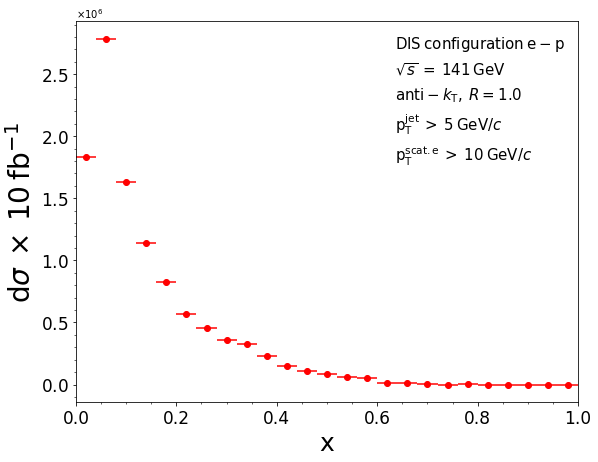

In [16]:
fig,ax = plt.subplots(figsize=(9,7))

plotData(data.query('lpt > 10')['x'], bins = 25, arange = (0,1), normed = True)

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{scat. e} \: > \: 10 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\mathrm{x}$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,1)
plt.ylabel(r'$\mathrm{d} \sigma \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 28)
# plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})
ax.yaxis.set_major_formatter(formatter)

counts, edges = np.histogram(data.query('lpt > 10')['x'], bins = 25)
print np.sum( counts )

plt.savefig('ep_sim_jet_x_lptCut.pdf')

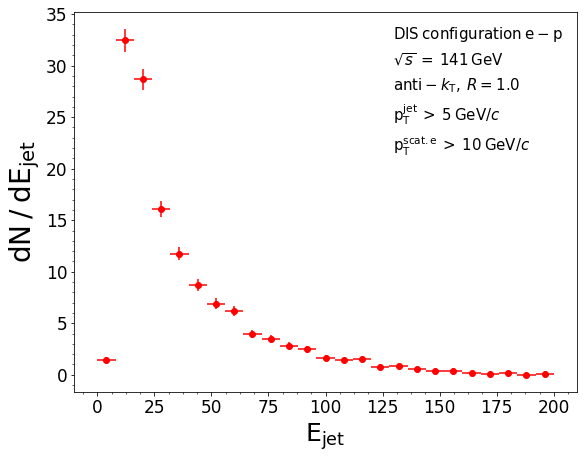

In [17]:
fig = plt.figure(figsize=(9,7))

plotData(data.query('lpt > 10')['e'], bins = 25, arange = (0,200))

plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{scat. e} \: > \: 10 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\mathrm{E}_{\mathrm{jet}}$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.ylabel(r'$\mathrm{dN} \: / \: \mathrm{d} \mathrm{E}_{\mathrm{jet}}}$', fontsize = 28)
# plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})

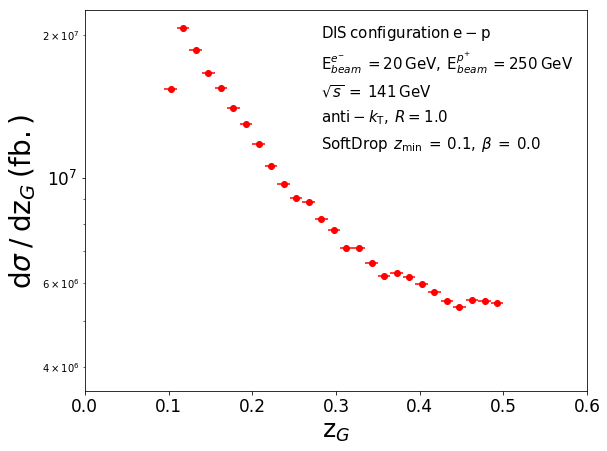

In [18]:
fig = plt.figure(figsize=(9,7))

plotData(data['zg'], 100, normed = True)
plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{SoftDrop} \: \: z_{\mathrm{min}} \: = \: 0.1, \: \beta \: = \: 0.0$', color='white')
plt.xlabel(r'$\mathrm{z}_{G}$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,0.6)
plt.ylabel(r'$\mathrm{d} \sigma \: / \: \mathrm{d} \mathrm{z}_{G} \: (\mathrm{fb.})$', fontsize = 28)
plt.yticks(fontsize =17)
plt.yscale('log')

plt.legend(loc='upper right', frameon=False, prop={'size':15})

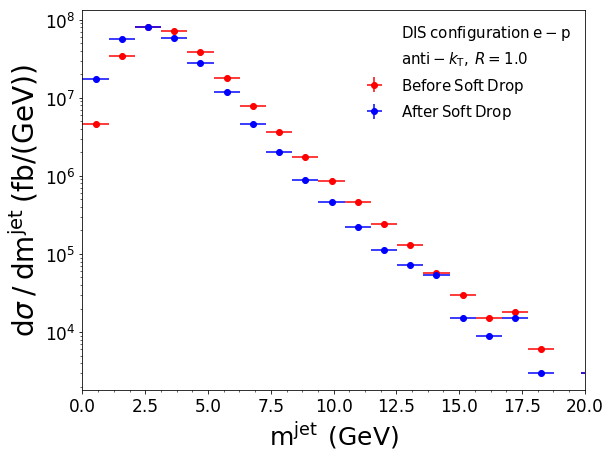

In [19]:
fig = plt.figure(figsize=(9,7))

plotData(data['m'], bins = 20, normed = True, label=r'$\mathrm{Before \: Soft \: Drop}$')
plotData(data['sdm'], bins = 20, color = 'blue', normed = True, label=r'$\mathrm{After \: Soft \: Drop}$')
plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
# plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
# plt.plot([],[],'',label=r'$Q^2 \: > \: 1 \: \mathrm{GeV}^2$', color='white')
# plt.plot([],[],'',label=r'$0.01 \: < \: y \: < \: 0.95$', color='white')

plt.xlabel(r'$\mathrm{m}^\mathrm{jet} \:\:(\mathrm{GeV})$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,20)
plt.ylabel(r'$\mathrm{d} \sigma \: / \: \mathrm{d} \mathrm{m}^{\mathrm{jet}} \: (\mathrm{fb} / (\mathrm{GeV}))$', fontsize = 28)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})

/Users/jose/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """
/Users/jose/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


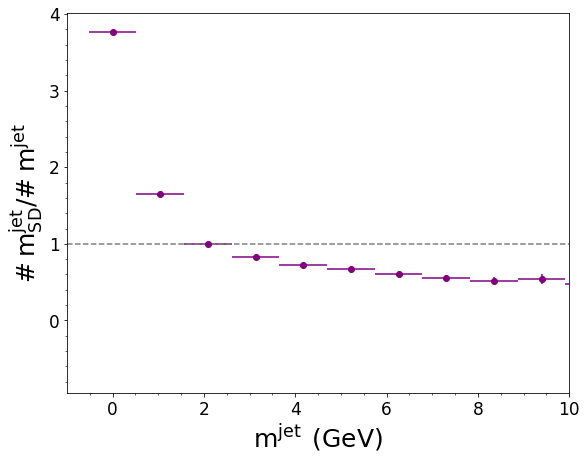

In [20]:
counts, edges = np.histogram(data['m'], bins = 20)
binWidth = (edges[1] - edges[0]) / 2

counts_2, edges_2 = np.histogram(data['sdm'], bins = 20)
ratio = counts_2 / np.double(counts)

fig = plt.figure(figsize=(9,7))

yerr = np.sqrt( (np.sqrt(counts) / counts)**2 + (np.sqrt(counts_2) / counts_2**2))

plt.errorbar(edges[:-1], ratio, xerr  = binWidth, yerr = yerr, color = 'purple',fmt = 'o')

plt.xlabel(r'$\mathrm{m}^\mathrm{jet} \:\:(\mathrm{GeV})$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(-1,10)
plt.axhline(y=1, linestyle= '--', color = 'grey')
plt.ylabel(r'$ \# \: \mathrm{m}^\mathrm{jet}_{\mathrm{SD}} / \# \: \mathrm{m}^\mathrm{jet}$', fontsize = 25)
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})

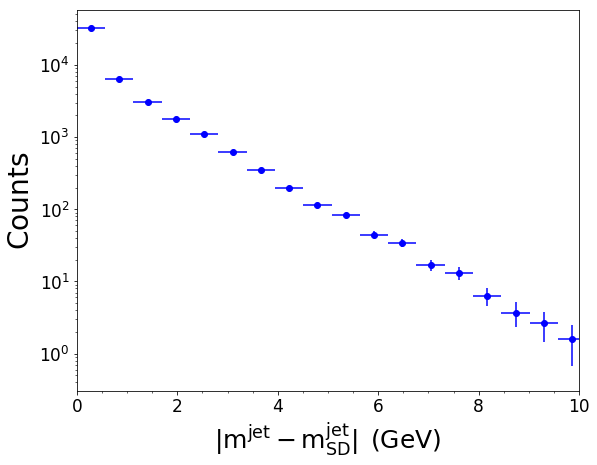

In [21]:
fig = plt.figure(figsize=(9,7))

plotData(np.abs(data['m'] - data['sdm']), bins = 20, color = 'blue')

plt.xlabel(r'$|\mathrm{m}^\mathrm{jet} -  \mathrm{m}^\mathrm{jet}_{\mathrm{SD}}| \:\:(\mathrm{GeV})$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,10)
plt.ylabel(r'$\mathrm{Counts}$', fontsize = 28)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})

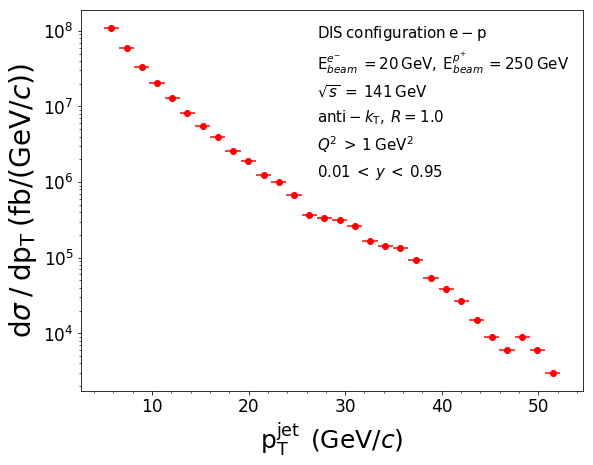

In [22]:
fig = plt.figure(figsize=(9,7))

plotData(data["pt"],bins = 30, normed = True);
plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$Q^2 \: > \: 1 \: \mathrm{GeV}^2$', color='white')
plt.plot([],[],'',label=r'$0.01 \: < \: y \: < \: 0.95$', color='white')

plt.xlabel(r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \:\:(\mathrm{GeV}/c)$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.ylabel(r'$\mathrm{d} \sigma \: / \: \mathrm{d} \mathrm{p}_\mathrm{T} \: (\mathrm{fb} / (\mathrm{GeV} /c))$', fontsize = 28)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})

plt.savefig('ep_sim_jet_pT.pdf')

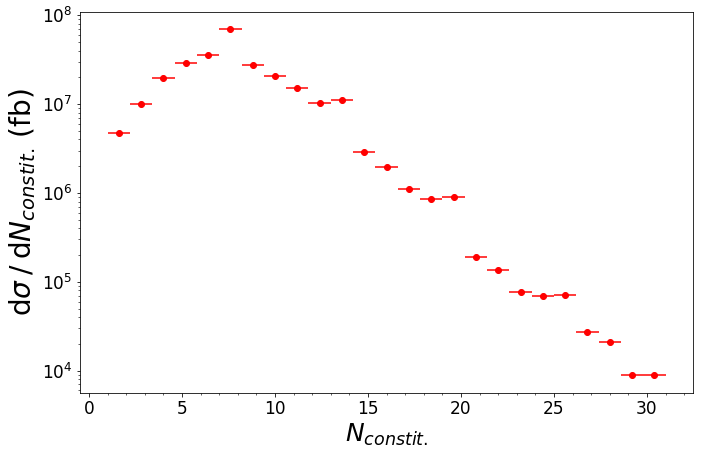

In [23]:
fig = plt.figure(figsize=(11,7))

plotData(data["mult"],bins = 25, normed = True);
# plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
# plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
# plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.xlabel(r'$N_{constit.}$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.ylabel(r'$\mathrm{d} \sigma \: / \: \mathrm{d} N_{constit.} \: (\mathrm{fb})$', fontsize = 28)
plt.yticks(fontsize =17)
plt.yscale('log')
plt.minorticks_on()
plt.legend(loc='upper right', frameon=False, prop={'size':15})

plt.savefig('ep_sim_jet_N.pdf')

In [24]:
print np.mean(data['mult'])

7.763156


In [25]:
part_data.eval("Q2 = (Q)*Q", inplace = True)

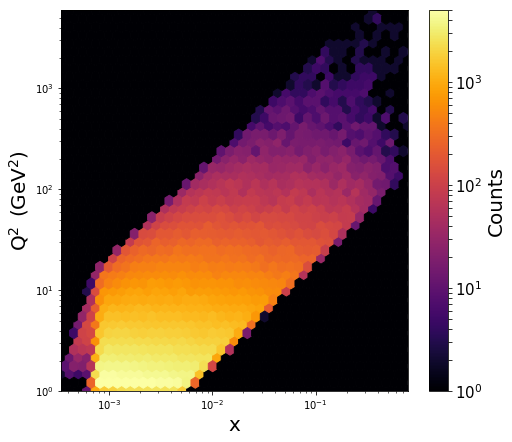

In [26]:
xmin = np.amin(part_data['x'])
xmax = np.amax(part_data['x'])
ymin = np.amin(part_data['Q2'])
ymax = np.amax(part_data['Q2'])

fig, axs = plt.subplots(figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs

hb = ax.hexbin(part_data['x'], part_data['Q2'],xscale='log',yscale='log', norm=matplotlib.colors.LogNorm(1,5000), gridsize=40, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax], fontsize=17)
ax.set_xlabel(r'$\mathrm{x}$', fontsize = 20)
ax.set_ylabel('$\mathrm{Q}^2 \:\: (\mathrm{GeV}^2)$', fontsize=20)
cb = fig.colorbar(hb, ax=ax)
cb.ax.tick_params(labelsize=15)
cb.set_label('Counts', fontsize=20)

plt.show()

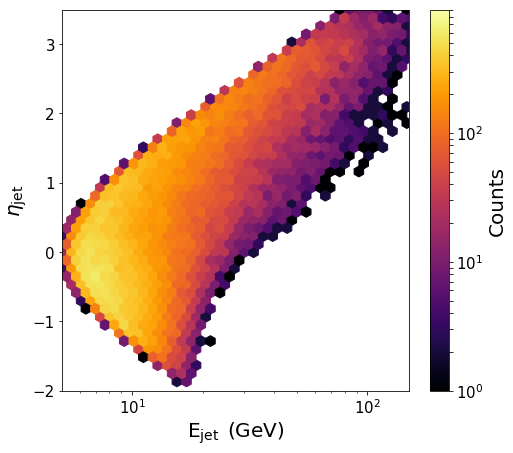

In [27]:
xmin = np.amin(data['e'])
xmax = np.amax(data['e'])
ymin = np.amin(data['eta'])
ymax = np.amax(data['eta'])

fig, axs = plt.subplots(figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs

hb = ax.hexbin(data['e'], data['eta'], xscale='log', gridsize=40, norm=matplotlib.colors.LogNorm(1,900), cmap='inferno', mincnt=1)
ax.axis([xmin, 150, -2, ymax], fontsize=17)
ax.set_xlabel(r'$\mathrm{E}_\mathrm{jet} \:\:(\mathrm{GeV})$', fontsize = 20)
plt.xticks(fontsize = 15)
ax.set_ylabel('$\eta_\mathrm{jet}$', fontsize=20)
plt.yticks(fontsize = 15)
cb = fig.colorbar(hb, ax=ax)
cb.ax.tick_params(labelsize=15)
cb.set_label('Counts', fontsize=20)

plt.show()

plt.savefig('ep_sim_jet_eta_E.pdf')

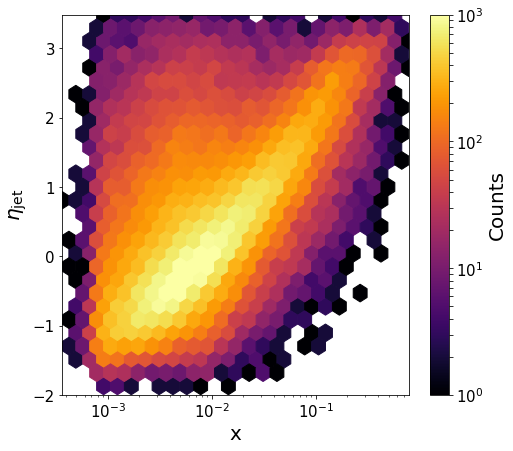

In [28]:
xmin = np.amin(data['x'])
xmax = np.amax(data['x'])
ymin = np.amin(data['eta'])
ymax = np.amax(data['eta'])

fig, axs = plt.subplots(figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs

hb = ax.hexbin(data['x'], data['eta'], xscale='log', norm=matplotlib.colors.LogNorm(1,1000), gridsize=25, cmap='inferno', mincnt=1)
ax.axis([xmin, xmax, -2, ymax], fontsize=17)
ax.set_xlabel(r'$\mathrm{x}$', fontsize = 20)
plt.yticks(fontsize = 15)
ax.set_ylabel('$\eta_\mathrm{jet}$', fontsize=20)
plt.xticks(fontsize = 15)
cb = fig.colorbar(hb, ax=ax)
cb.ax.tick_params(labelsize=15)
cb.set_label('Counts', fontsize=20)

plt.show()

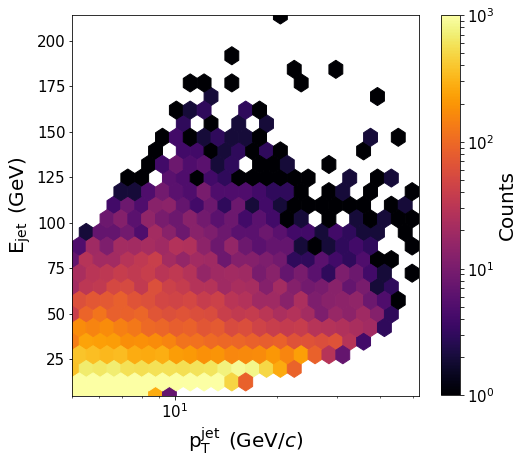

In [29]:
xmin = np.amin(data['pt'])
xmax = np.amax(data['pt'])
ymin = np.amin(data['e'])
ymax = np.amax(data['e'])

fig, axs = plt.subplots(figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs

hb = ax.hexbin(data['pt'], data['e'], xscale='log', gridsize=25, norm=matplotlib.colors.LogNorm(1,1000), cmap='inferno',mincnt=1)
ax.axis([xmin, xmax, ymin, ymax], fontsize=17)
ax.set_xlabel(r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \:\:(\mathrm{GeV}/c)$', fontsize = 20)
plt.xticks(fontsize = 15)
ax.set_ylabel(r'$\mathrm{E}_\mathrm{jet} \:\:(\mathrm{GeV})$', fontsize=20)
plt.yticks(fontsize = 15)
cb = fig.colorbar(hb, ax=ax)
cb.ax.tick_params(labelsize=15)
cb.set_label('Counts', fontsize=20)

plt.show()

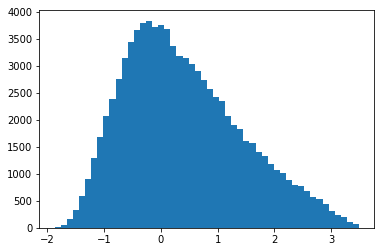

In [30]:
plt.hist(data['eta'], bins = 50);

In [31]:
data_x1 = data.query('x < 0.01')

data_x2 = data.query('x > 0.1')

In [32]:
jets_pt_1 = np.array(['5','10','15','20','25','30','35','40','45','50','55'])
jets_pt_2 = np.array(['55','60','65','70','75','80','85','90','95','100','105'])
jets_pt_3 = np.array(['105','110','115','120','125','130'])

jet_mult_x     = np.array([7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5,
                           82.5, 87.5, 92.5, 97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5])
jet_mult_x_err = [2.5]*(jet_mult_x.shape[0])

In [33]:
def bins(inputDataframe, variable, array, i):
    
        i = i - 1
        
        if i == 1:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i]) +     '')
            
            return df1
        if i == 2:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2
        if i == 3:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3
        if i == 4:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4
        if i == 5:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5
        if i == 6:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6
        if i == 7:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7
        if i == 8: 
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 8]) + ' and ' + str(variable) + ' < ' + str(array[i - 7]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df8 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7, df8
        if i == 9:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 9]) + ' and ' + str(variable) + ' < ' + str(array[i - 8]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 8]) + ' and ' + str(variable) + ' < ' + str(array[i - 7]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df8 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df9 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7, df8, df9
        if i == 10:
            df1 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 10])+ ' and ' + str(variable) + ' < ' + str(array[i - 9]) + '')
            df2 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 9]) + ' and ' + str(variable) + ' < ' + str(array[i - 8]) + '')
            df3 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 8]) + ' and ' + str(variable) + ' < ' + str(array[i - 7]) + '')
            df4 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 7]) + ' and ' + str(variable) + ' < ' + str(array[i - 6]) + '')
            df5 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 6]) + ' and ' + str(variable) + ' < ' + str(array[i - 5]) + '')
            df6 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 5]) + ' and ' + str(variable) + ' < ' + str(array[i - 4]) + '')
            df7 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 4]) + ' and ' + str(variable) + ' < ' + str(array[i - 3]) + '')
            df8 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 3]) + ' and ' + str(variable) + ' < ' + str(array[i - 2]) + '')
            df9 = inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 2]) + ' and ' + str(variable) + ' < ' + str(array[i - 1]) + '')
            df10= inputDataframe.query('' + str(variable) + ' > ' + str(array[i - 1]) + ' and ' + str(variable) + ' < ' + str(array[i])     + '')
            
            return df1, df2, df3, df4, df5, df6, df7, df8, df9, df10
        
        else:
            print('Need more or have too many entries in your array.')

In [34]:
jets1_a ,jets2_a ,jets3_a ,jets4_a ,jets5_a ,jets6_a ,jets7_a ,jets8_a ,jets9_a ,jets10_a = bins(data_x1,'e',jets_pt_1,jets_pt_1.shape[0])
jets11_a,jets12_a,jets13_a,jets14_a,jets15_a,jets16_a,jets17_a,jets18_a,jets19_a,jets20_a = bins(data_x1,'e',jets_pt_2,jets_pt_2.shape[0])
jets21_a,jets22_a,jets23_a,jets24_a,jets25_a                                              = bins(data_x1,'e',jets_pt_3,jets_pt_3.shape[0])

In [35]:
jets1_c ,jets2_c ,jets3_c ,jets4_c ,jets5_c ,jets6_c ,jets7_c ,jets8_c ,jets9_c, jets10_c = bins(data_x2,'e',jets_pt_1,jets_pt_1.shape[0])
jets11_c,jets12_c,jets13_c,jets14_c,jets15_c,jets16_c,jets17_c,jets18_c,jets19_c,jets20_c = bins(data_x2,'e',jets_pt_2,jets_pt_2.shape[0])
jets21_c,jets22_c,jets23_c,jets24_c,jets25_c                                              = bins(data_x2,'e',jets_pt_3,jets_pt_3.shape[0])

(array([4., 1., 0., 3., 2., 2., 1., 1., 4., 2.]),
 array([100.44477 , 100.88815 , 101.331535, 101.77492 , 102.2183  ,
        102.66168 , 103.105064, 103.54845 , 103.99183 , 104.43521 ,
        104.87859 ], dtype=float32),
 <a list of 10 Patch objects>)

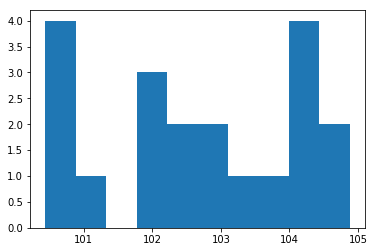

In [36]:
plt.hist(jets20_a['e'],bins=10)

In [37]:
jets1_mult_a  = np.mean(jets1_a['mult'])
jets2_mult_a  = np.mean(jets2_a['mult'])
jets3_mult_a  = np.mean(jets3_a['mult'])
jets4_mult_a  = np.mean(jets4_a['mult'])
jets5_mult_a  = np.mean(jets5_a['mult'])
jets6_mult_a  = np.mean(jets6_a['mult'])
jets7_mult_a  = np.mean(jets7_a['mult'])
jets8_mult_a  = np.mean(jets8_a['mult'])
jets9_mult_a  = np.mean(jets9_a['mult'])

jets10_mult_a = np.mean(jets10_a['mult'])
jets11_mult_a = np.mean(jets11_a['mult'])
jets12_mult_a = np.mean(jets12_a['mult'])
jets13_mult_a = np.mean(jets13_a['mult'])
jets14_mult_a = np.mean(jets14_a['mult'])
jets15_mult_a = np.mean(jets15_a['mult'])
jets16_mult_a = np.mean(jets16_a['mult'])
jets17_mult_a = np.mean(jets17_a['mult'])
jets18_mult_a = np.mean(jets18_a['mult'])
jets19_mult_a = np.mean(jets19_a['mult'])
jets20_mult_a = np.mean(jets20_a['mult'])
jets21_mult_a = np.mean(jets21_a['mult'])
jets22_mult_a = np.mean(jets22_a['mult'])
jets23_mult_a = np.mean(jets23_a['mult'])
jets24_mult_a = np.mean(jets24_a['mult'])
jets25_mult_a = np.mean(jets25_a['mult'])

jet_mult_a = np.array([jets1_mult_a,jets2_mult_a,jets3_mult_a,jets4_mult_a,jets5_mult_a,jets6_mult_a,jets7_mult_a,
                       jets8_mult_a,jets9_mult_a,jets10_mult_a,jets11_mult_a,jets12_mult_a,jets13_mult_a,
                       jets14_mult_a,jets15_mult_a,jets16_mult_a,jets17_mult_a,jets18_mult_a,jets19_mult_a,
                       jets20_mult_a,jets21_mult_a,jets22_mult_a,jets23_mult_a,jets24_mult_a,jets25_mult_a])

jet_mult_y_err_a = np.array([np.std(jets1_a['mult']),np.std(jets2_a['mult']),np.std(jets3_a['mult']),
                           np.std(jets4_a['mult']),np.std(jets5_a['mult']),np.std(jets6_a['mult']),
                           np.std(jets7_a['mult']),np.std(jets8_a['mult']),np.std(jets9_a['mult']),
                           np.std(jets10_a['mult']),np.std(jets11_a['mult']),np.std(jets12_a['mult']),
                           np.std(jets13_a['mult']),np.std(jets14_a['mult']),np.std(jets15_a['mult']),
                           np.std(jets16_a['mult']),np.std(jets17_a['mult']),np.std(jets18_a['mult']),
                           np.std(jets19_a['mult']),np.std(jets20_a['mult']),np.std(jets21_a['mult']),
                           np.std(jets22_a['mult']),np.std(jets23_a['mult']),np.std(jets24_a['mult']),
                           np.std(jets25_a['mult'])])

In [38]:
jets1_mult_c  = np.mean(jets1_c['mult'])
jets2_mult_c  = np.mean(jets2_c['mult'])
jets3_mult_c  = np.mean(jets3_c['mult'])
jets4_mult_c  = np.mean(jets4_c['mult'])
jets5_mult_c  = np.mean(jets5_c['mult'])
jets6_mult_c  = np.mean(jets6_c['mult'])
jets7_mult_c  = np.mean(jets7_c['mult'])
jets8_mult_c  = np.mean(jets8_c['mult'])
jets9_mult_c  = np.mean(jets9_c['mult'])

jets10_mult_c = np.mean(jets10_c['mult'])
jets11_mult_c = np.mean(jets11_c['mult'])
jets12_mult_c = np.mean(jets12_c['mult'])
jets13_mult_c = np.mean(jets13_c['mult'])
jets14_mult_c = np.mean(jets14_c['mult'])
jets15_mult_c = np.mean(jets15_c['mult'])
jets16_mult_c = np.mean(jets16_c['mult'])
jets17_mult_c = np.mean(jets17_c['mult'])
jets18_mult_c = np.mean(jets18_c['mult'])
jets19_mult_c = np.mean(jets19_c['mult'])
jets20_mult_c = np.mean(jets20_c['mult'])
jets21_mult_c = np.mean(jets21_c['mult'])
jets22_mult_c = np.mean(jets22_c['mult'])
jets23_mult_c = np.mean(jets23_c['mult'])
jets24_mult_c = np.mean(jets24_c['mult'])
jets25_mult_c = np.mean(jets25_c['mult'])

jet_mult_c = np.array([jets1_mult_c,jets2_mult_c,jets3_mult_c,jets4_mult_c,jets5_mult_c,jets6_mult_c,jets7_mult_c,
                       jets8_mult_c,jets9_mult_c,jets10_mult_c,jets11_mult_c,jets12_mult_c,jets13_mult_c,
                       jets14_mult_c,jets15_mult_c,jets16_mult_c,jets17_mult_c,jets18_mult_c,jets19_mult_c,
                       jets20_mult_c,jets21_mult_c,jets22_mult_c,jets23_mult_c,jets24_mult_c,jets25_mult_c])

jet_mult_y_err_c = np.array([np.std(jets1_c['mult']),np.std(jets2_c['mult']),np.std(jets3_c['mult']),
                           np.std(jets4_c['mult']) ,np.std(jets5_c['mult']) ,np.std(jets6_c['mult']),
                           np.std(jets7_c['mult']) ,np.std(jets8_c['mult']) ,np.std(jets9_c['mult']),
                           np.std(jets10_c['mult']),np.std(jets11_c['mult']),np.std(jets12_c['mult']),
                           np.std(jets13_c['mult']),np.std(jets14_c['mult']),np.std(jets15_c['mult']),
                           np.std(jets16_c['mult']),np.std(jets17_c['mult']),np.std(jets18_c['mult']),
                           np.std(jets19_c['mult']),np.std(jets20_c['mult']),np.std(jets21_c['mult']),
                           np.std(jets22_c['mult']),np.std(jets23_c['mult']),np.std(jets24_c['mult']),
                           np.std(jets25_c['mult'])])

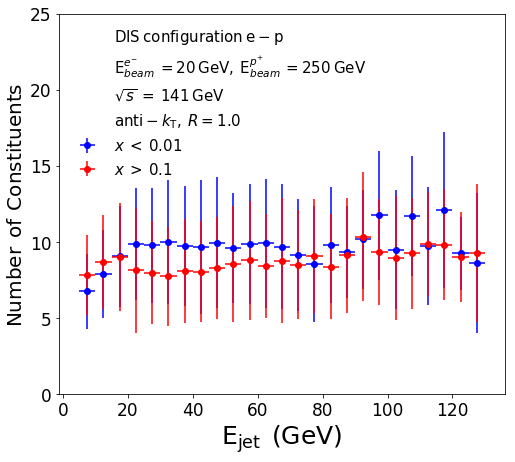

In [39]:
fig = plt.figure(figsize=(8,7))

plt.errorbar(jet_mult_x, jet_mult_a, xerr=jet_mult_x_err, yerr=jet_mult_y_err_a, fmt='o', color = 'blue',label=r'$x \: < \: 0.01$')
plt.errorbar(jet_mult_x, jet_mult_c, xerr=jet_mult_x_err, yerr=jet_mult_y_err_c, fmt='o', color = 'red', label=r'$x \: > \: 0.1$')
plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.xlabel(r'$\mathrm{E}_{\mathrm{jet}} \:\: (\mathrm{GeV})$', fontsize = 25)
plt.xticks(fontsize = 17)
# plt.xlim(0,30)
plt.ylabel(r'$\mathrm{Number \:\: of \:\: Constituents}$', fontsize = 20)
plt.yticks(fontsize =17)
plt.ylim(0,25)
plt.legend(loc='upper left', frameon=False, prop={'size':15})

In [40]:
jets_pt_1 = np.array(['5','6','7','8','9','10','11','12','13','14','15'])
jets_pt_2 = np.array(['15','16','17','18','19','20','21','22','23','24','25'])
jets_pt_3 = np.array(['25','26','27','28','29','30'])

jet_mult_x     = np.array([5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5,
                           20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5])
jet_mult_x_err = [0.5]*(jet_mult_x.shape[0])

In [41]:
jets1_a ,jets2_a ,jets3_a ,jets4_a ,jets5_a ,jets6_a ,jets7_a ,jets8_a ,jets9_a ,jets10_a = bins(data,'pt',jets_pt_1,jets_pt_1.shape[0])
jets11_a,jets12_a,jets13_a,jets14_a,jets15_a,jets16_a,jets17_a,jets18_a,jets19_a,jets20_a = bins(data,'pt',jets_pt_2,jets_pt_2.shape[0])
jets21_a,jets22_a,jets23_a,jets24_a,jets25_a                                              = bins(data,'pt',jets_pt_3,jets_pt_3.shape[0])

In [42]:
jets1_mult_a  = np.mean(jets1_a['mult'])
jets2_mult_a  = np.mean(jets2_a['mult'])
jets3_mult_a  = np.mean(jets3_a['mult'])
jets4_mult_a  = np.mean(jets4_a['mult'])
jets5_mult_a  = np.mean(jets5_a['mult'])
jets6_mult_a  = np.mean(jets6_a['mult'])
jets7_mult_a  = np.mean(jets7_a['mult'])
jets8_mult_a  = np.mean(jets8_a['mult'])
jets9_mult_a  = np.mean(jets9_a['mult'])

jets10_mult_a = np.mean(jets10_a['mult'])
jets11_mult_a = np.mean(jets11_a['mult'])
jets12_mult_a = np.mean(jets12_a['mult'])
jets13_mult_a = np.mean(jets13_a['mult'])
jets14_mult_a = np.mean(jets14_a['mult'])
jets15_mult_a = np.mean(jets15_a['mult'])
jets16_mult_a = np.mean(jets16_a['mult'])
jets17_mult_a = np.mean(jets17_a['mult'])
jets18_mult_a = np.mean(jets18_a['mult'])
jets19_mult_a = np.mean(jets19_a['mult'])
jets20_mult_a = np.mean(jets20_a['mult'])
jets21_mult_a = np.mean(jets21_a['mult'])
jets22_mult_a = np.mean(jets22_a['mult'])
jets23_mult_a = np.mean(jets23_a['mult'])
jets24_mult_a = np.mean(jets24_a['mult'])
jets25_mult_a = np.mean(jets25_a['mult'])

jet_mult_a = np.array([jets1_mult_a,jets2_mult_a,jets3_mult_a,jets4_mult_a,jets5_mult_a,jets6_mult_a,jets7_mult_a,
                       jets8_mult_a,jets9_mult_a,jets10_mult_a,jets11_mult_a,jets12_mult_a,jets13_mult_a,
                       jets14_mult_a,jets15_mult_a,jets16_mult_a,jets17_mult_a,jets18_mult_a,jets19_mult_a,
                       jets20_mult_a,jets21_mult_a,jets22_mult_a,jets23_mult_a,jets24_mult_a,jets25_mult_a])

jet_mult_y_err_a = np.array([np.std(jets1_a['mult']),np.std(jets2_a['mult']),np.std(jets3_a['mult']),
                           np.std(jets4_a['mult']),np.std(jets5_a['mult']),np.std(jets6_a['mult']),
                           np.std(jets7_a['mult']),np.std(jets8_a['mult']),np.std(jets9_a['mult']),
                           np.std(jets10_a['mult']),np.std(jets11_a['mult']),np.std(jets12_a['mult']),
                           np.std(jets13_a['mult']),np.std(jets14_a['mult']),np.std(jets15_a['mult']),
                           np.std(jets16_a['mult']),np.std(jets17_a['mult']),np.std(jets18_a['mult']),
                           np.std(jets19_a['mult']),np.std(jets20_a['mult']),np.std(jets21_a['mult']),
                           np.std(jets22_a['mult']),np.std(jets23_a['mult']),np.std(jets24_a['mult']),
                           np.std(jets25_a['mult'])])

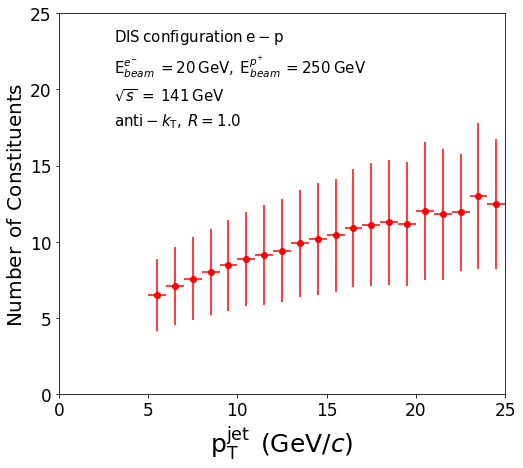

In [43]:
fig = plt.figure(figsize=(8,7))

plt.errorbar(jet_mult_x, jet_mult_a, xerr=jet_mult_x_err, yerr=jet_mult_y_err_a, fmt='o', color = 'red')
plt.plot([],[],'',label=r'$\mathrm{DIS \: configuration \: e-p}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.xlabel(r'$\mathrm{p}_\mathrm{T}^{\mathrm{jet}} \:\: (\mathrm{GeV}/c)$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,25)
plt.ylabel(r'$\mathrm{Number \:\: of \:\: Constituents}$', fontsize = 20)
plt.yticks(fontsize =17)
plt.ylim(0,25)
plt.legend(loc='upper left', frameon=False, prop={'size':15})

plt.savefig('ep_sim_jet_N_pT.pdf')

In [44]:
def plotX(array, bins, arange = None, color = 'red', fillstyle = 'full', label = ''):
    
    counts, edges = np.histogram(array, bins = bins, range = arange)
    binWidth = edges[1] - edges[0]
    
    xerr = np.log(edges[:-1])[1]- np.log(edges[:-1])[0]
    yerr = np.sqrt( counts )
    
    plt.errorbar(np.log(edges[:-1] + binWidth / 2), counts, xerr = xerr / 2, yerr = yerr, color = color, fillstyle = fillstyle, fmt='o', label = label)

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 810, in __bootstrap_inner
  File "<decorator-gen-24>", line 2, in run
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/history.py", line 60, in needs_sqlite
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/history.py", line 843, in run
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/ipykernel/iostream.py", line 400, in write
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/ipykernel/iostream.py", line 203, in schedule
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/ipykernel/iostream.py", line 101, in _event_pipe
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/zmq/sugar/context.py", line 146, in socket
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/zmq/sugar/socket.py", lin

In [45]:
# fig = plt.figure(figsize=(9,7))

# plotX(data.query('eta < 0.0')['x'], bins = 20, arange=(0,1), label = r'$\eta \: < \: 0.0$', color = 'green', fillstyle = 'none')
# plotX(data.query('0.0 < eta < 1.0')['x'], bins = 20, arange=(0,1), label = r'$0.0 \: < \eta \: < \: 1.0$', color = 'blue')
# plotX(data.query('1.0 < eta < 2.0')['x'], bins = 20, arange=(0,1), label = r'$1.0 \: < \eta \: < \: 2.0$', color = 'orange')
# plotX(data.query('2.0 < eta')['x'], bins = 20, arange=(0,1), label = r'$\eta \: > \: 2.0$', color = 'red', fillstyle = 'none')

# plt.xlabel(r'$\mathrm{x}$', fontsize = 25)
# plt.xticks(fontsize = 17)
# plt.ylabel(r'$\mathrm{dN}  \: / \: \mathrm{d} \mathrm{x}$', fontsize = 25)
# plt.xlim(-4,0)
# plt.yticks(fontsize =17)
# # plt.xscale("log")
# plt.yticks(fontsize =17)
# # plt.yscale("log")
# plt.minorticks_on()
# plt.legend(loc='upper right', frameon=False, prop={'size':15})

In [46]:
print 'RMS of x for -1 > eta: ',np.std(data.query('-1. > eta')['x'])
print 'Mean of x for -1 > eta:',np.mean(data.query('-1. > eta')['x'])
print '\n'
print 'RMS of x for -1 < eta < 0.0: ',np.std(data.query('-1. < eta < 0.0')['x'])
print 'Mean of x for -1 < eta < 0.0:',np.mean(data.query('-1. < eta < 0.0')['x'])
print '\n'
print 'RMS of x for 0.0 < eta < 1.0: ',np.std(data.query('0.0 < eta < 1.0')['x'])
print 'Mean of x for 0.0 < eta < 1.0:',np.mean(data.query('0.0 < eta < 1.0')['x'])
print '\n'
print 'RMS of x for 1.0 < eta < 2.0: ',np.std(data.query('1.0 < eta < 2.0')['x'])
print 'Mean of x for 1.0 < eta < 2.0:',np.mean(data.query('1.0 < eta < 2.0')['x'])
print '\n'
print 'RMS of x for eta > 2.0: ',np.std(data.query('eta > 2.0')['x'])
print 'Mean of x for eta > 2.0:',np.mean(data.query('eta > 2.0')['x'])

RMS of x for -1 > eta:  0.0054677296
Mean of x for -1 > eta: 0.0035398444


RMS of x for -1 < eta < 0.0:  0.007997973
Mean of x for -1 < eta < 0.0: 0.0062593347


RMS of x for 0.0 < eta < 1.0:  0.020811789
Mean of x for 0.0 < eta < 1.0: 0.015995314


RMS of x for 1.0 < eta < 2.0:  0.047985874
Mean of x for 1.0 < eta < 2.0: 0.041090526


RMS of x for eta > 2.0:  0.107740626
Mean of x for eta > 2.0: 0.10071939


|     bins  |  SD of x  |  Mean of x |
|-----------|-------|-------|
|  -1 > eta   | 0.005| 0.0035|
|  -1 < eta < 0  | 0.008| 0.0063|
|0 <  eta < 1  | 0.021| 0.016|
|1 <  eta < 2  | 0.047| 0.041|
|  eta > 2  | 0.11  | 0.10  |

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/ultratb.py", line 1132, in get_records
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/ultratb.py", line 313, in wrapped
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1044, in getinnerframes
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1004, in getframeinfo
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 454, in getsourcefile
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 483, in getmodule
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 467, in getabsfile
  File "/System/Library

IndexError: string index out of range

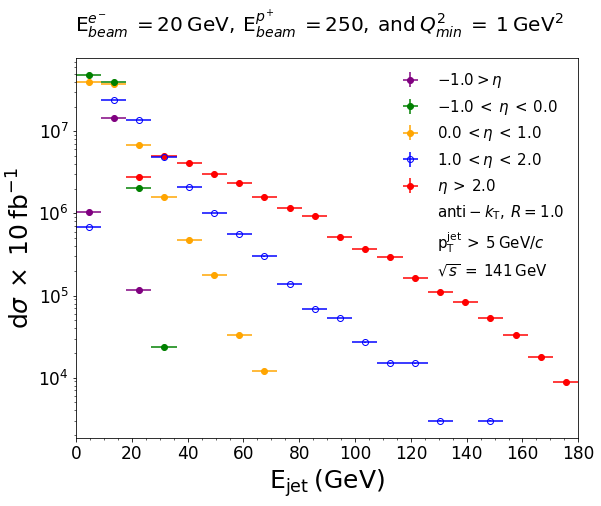

In [47]:
fig, ax = plt.subplots(figsize=(9,7))

fig.suptitle(r'$\mathrm{E}_{beam}^{e^{-}} \: = 20 \: \mathrm{GeV}, \: \mathrm{E}_{beam}^{p^{+}} \: = 250, \: \mathrm{and} \: Q^2_{min} \: = \: 1 \: \mathrm{GeV}^2$',fontsize = 20)
plotData(data.query('eta < -1.0')['e'], bins = 20, arange=(0,180), label = r'$ -1.0 > \eta$', color = 'purple', normed = True)
plotData(data.query('2.0 < eta')['e'], bins = 20, arange=(0,180), label = r'$\eta \: > \: 2.0$', color = 'red', normed = True)
plotData(data.query('0.0 < eta < 1.0')['e'], bins = 20, arange=(0,180), label = r'$0.0 \: < \eta \: < \: 1.0$', color = 'orange', normed = True)
plotData(data.query('1.0 < eta < 2.0')['e'], bins = 20, arange=(0,180), label = r'$1.0 \: < \eta \: < \: 2.0$', color = 'blue', fillstyle = 'none',normed = True)
plotData(data.query('-1.0 < eta < 0.0')['e'], bins = 20, arange=(0,180), label = r'$-1.0 \:< \:\eta \: < \: 0.0$', color = 'green', normed = True)
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\mathrm{E}_\mathrm{jet} \: (\mathrm{GeV})$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,180)
plt.ylabel(r'$\mathrm{d} \sigma  \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 25)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, frameon=False, prop={'size':15})

plt.savefig('ep_sim_jet_E_etaBins.pdf')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/ultratb.py", line 1132, in get_records
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/ultratb.py", line 313, in wrapped
  File "/Users/jose/Library/Python/2.7/lib/python/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1044, in getinnerframes
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1004, in getframeinfo
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 454, in getsourcefile
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 483, in getmodule
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 467, in getabsfile
  File "/System/Library

IndexError: string index out of range

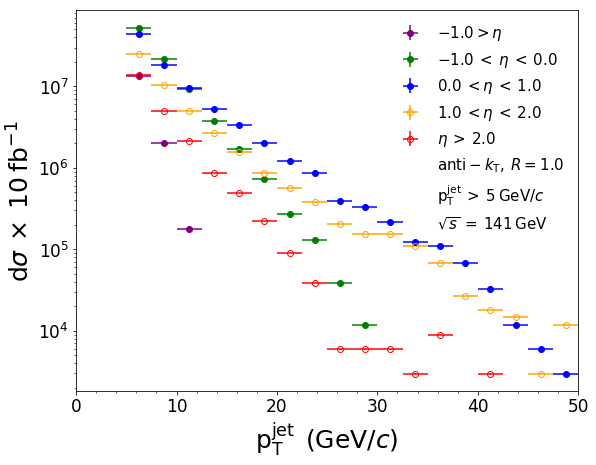

In [48]:
fig, ax = plt.subplots(figsize=(9,7))

plotData(data.query('eta < -1.0')['pt'], bins = 20, arange=(0,50), label = r'$ -1.0 > \eta$', color = 'purple', normed = True)
plotData(data.query('-1. < eta < 0.0')['pt'], bins = 20, arange=(0,50), label = r'$ -1.0 \: < \: \eta \: < \: 0.0$', color = 'green', normed = True)
plotData(data.query('0.0 < eta < 1.0')['pt'], bins = 20, arange=(0,50), label = r'$0.0 \: < \eta \: < \: 1.0$', color = 'blue', normed = True)
plotData(data.query('1.0 < eta < 2.0')['pt'], bins = 20, arange=(0,50), label = r'$1.0 \: < \eta \: < \: 2.0$', fillstyle = 'none', color = 'orange', normed = True)
plotData(data.query('2.0 < eta')['pt'], bins = 20, arange=(0,50), label = r'$\eta \: > \: 2.0$', color = 'red',fillstyle = 'none', normed = True)
plt.plot([],[],'',label=r'$\sqrt{s}\:=\:141 \: \mathrm{GeV}$', color='white')
plt.plot([],[],'',label=r'$\mathrm{anti}-k_{\mathrm{T}}, \: R=1.0$', color='white')
plt.plot([],[],'',label=r'$\mathrm{p}_\mathrm{T}^\mathrm{jet} \: > \: 5 \:\mathrm{GeV}/c$', color='white')

plt.xlabel(r'$\mathrm{p}_\mathrm{T}^{\mathrm{jet}} \:\: (\mathrm{GeV}/c)$', fontsize = 25)
plt.xticks(fontsize = 17)
plt.xlim(0,50)
plt.ylabel(r'$\mathrm{d} \sigma  \: \times \: \mathrm{10} \: \mathrm{fb^{-1}}$', fontsize = 25)
plt.yscale("log")
plt.yticks(fontsize =17)
plt.minorticks_on()

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, frameon=False, prop={'size':15})

plt.savefig('ep_sim_jet_pT_etaBins.pdf')